In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

### (a) 

Quantitative and qualitative predictors?

In [2]:
df = pd.read_csv('../data/Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**Year** and **Origin** are qualitative predictors, the rest predictors are quantitative.

### (b) (c)

In [3]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### (d)

In [4]:
df_partial = df.drop(df.index[[i for i in range(10, 86)]])
df_partial.shape, df.shape

((321, 9), (397, 9))

In [5]:
df_partial.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,24.444860,5.370717,187.174455,2933.183801,15.709034,77.143302,1.598131
std,7.899928,1.653486,99.864568,809.638650,2.706441,3.128202,0.816163
min,11.000000,3.000000,68.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,145.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.700000,6.000000,250.000000,3504.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000,3.000000


### (e) (f)

In [6]:
cm = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = ~mask

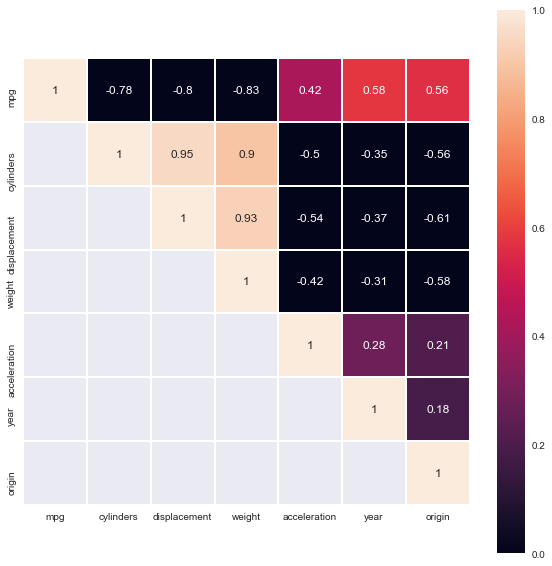

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, mask=mask, vmin=0, vmax=1, linewidths=1, square=True)

From the heatmap, we can see some predictors have strong correlation. For example, **cylinders** and **displacement** are obviously, more correlated.

In [8]:
INTEREST_COLUMNS = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']
df_interest = df[INTEREST_COLUMNS]
df_interest

,mpg,cylinders,displacement,weight,acceleration
0,18.0,8,307.0,3504,12.0
1,15.0,8,350.0,3693,11.5
2,18.0,8,318.0,3436,11.0
3,16.0,8,304.0,3433,12.0
4,17.0,8,302.0,3449,10.5
5,15.0,8,429.0,4341,10.0
6,14.0,8,454.0,4354,9.0
7,14.0,8,440.0,4312,8.5
8,14.0,8,455.0,4425,10.0
9,15.0,8,390.0,3850,8.5


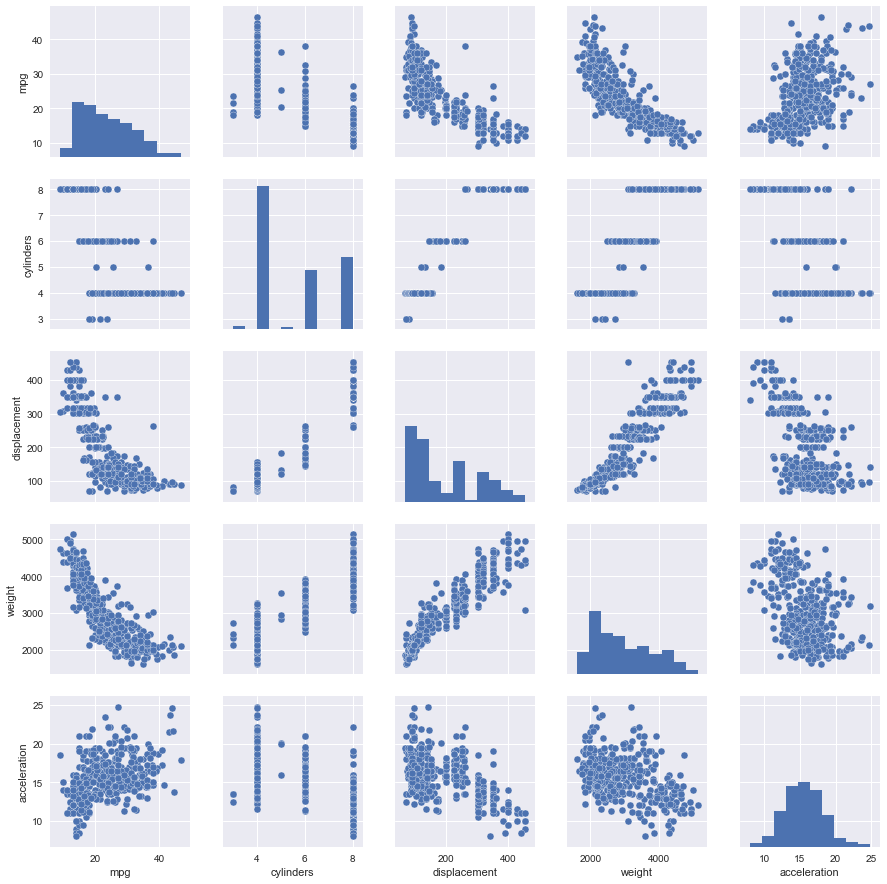

In [9]:
sns.pairplot(df_interest)

There are many predictors are nearly linearly correlated. For example, the scatterplots of **weight** and **displacement** with **mpg** are giving significant linear relations.